Process flow


Timing - time per activity/event, time per case

In [100]:
import numpy as np
import pandas as pd
import graphviz

In [51]:
final = pd.read_excel("P2P Data Extract Random AG.xlsx")
final.head()

,Entity,Account,Document Date,Document No.,Invoice Receival = Doc Arrival Date,Posting Date = Invoice approved,Invoice approved = 1st approval,Invoice approved = 2nd approval,Compensation = Payment performed,Comment,Gross Amount in house currency,Vendor Name
0,4097,402133,2017-02-07,3200004050,2017-02-13 06:40:00,2017-05-03,2017-02-17,NaT,NaT,NaN,22059.94,Sunlight Microsystems
1,4097,402225,2017-05-04,3200004417,2017-05-11 07:47:00,2017-05-17,2017-05-16,NaT,2017-05-17,Reversal,16026.44,Timber Security
2,4097,406913,2017-03-30,3200003800,2017-04-18 10:21:00,2017-04-25,2017-04-21,2017-04-24,2017-04-25,Reversal,10567.20,Life Corp
3,4097,404791,2017-02-15,3100000253,2017-04-28 10:29:00,2017-05-26,2017-04-28,2017-04-28,2017-05-29,NaN,7020.00,Prime Aviation
4,4097,408426,2017-04-19,3100000223,2017-04-25 10:38:00,2017-05-08,NaT,NaT,2017-05-08,Reversal,5850.04,Moon Co.


### Data Transformation

First, melt the data in order to get them into the required format for my analysis

In [52]:
df = pd.melt(final, id_vars=['Entity', 'Account', 'Document No.',
       'Comment', 'Gross Amount in house currency', 'Vendor Name'], var_name='Events', value_name='Date')
df

,Entity,Account,Document No.,Comment,Gross Amount in house currency,Vendor Name,Events,Date
0,4097,402133,3200004050,NaN,22059.94,Sunlight Microsystems,Document Date,2017-02-07
1,4097,402225,3200004417,Reversal,16026.44,Timber Security,Document Date,2017-05-04
2,4097,406913,3200003800,Reversal,10567.20,Life Corp,Document Date,2017-03-30
3,4097,404791,3100000253,NaN,7020.00,Prime Aviation,Document Date,2017-02-15
4,4097,408426,3100000223,Reversal,5850.04,Moon Co.,Document Date,2017-04-19
...,...,...,...,...,...,...,...,...
10171,4097,407301,3200004067,NaN,-131895.70,Aces,Compensation = Payment performed,2017-05-08
10172,4097,402893,3200002874,NaN,-156035.29,Woodbank,Compensation = Payment performed,2017-04-07
10173,4097,402893,3200003905,NaN,-162435.61,Woodbank,Compensation = Payment performed,2017-05-08
10174,4097,402893,3200004653,NaN,-162435.61,Woodbank,Compensation = Payment performed,2017-06-08


After doing this, I realised that there are some rows in the 'Date' columns which do not contain dates. This maybe because those activities do not occur in the particular purchase order. To get a better dataset, I will drop those rows with NaT. 


Next step is to arrange the dataset using the unique values (Document No.) and Date. This is to arrange all the Purchase requests accoring to how the activities were performed (by date)

In [53]:
df = df.dropna(subset=['Date'])
df = df.sort_values(by=['Document No.', 'Date'], ascending=True).reset_index(drop=True)
df

,Entity,Account,Document No.,Comment,Gross Amount in house currency,Vendor Name,Events,Date
0,4097,403971,3100000174,NaN,24.28,Squidware,Document Date,2017-03-27 00:00:00
1,4097,403971,3100000174,NaN,24.28,Squidware,Invoice Receival = Doc Arrival Date,2017-03-30 07:22:00
2,4097,403971,3100000174,NaN,24.28,Squidware,Posting Date = Invoice approved,2017-04-04 00:00:00
3,4097,403971,3100000174,NaN,24.28,Squidware,Compensation = Payment performed,2017-04-04 00:00:00
4,4097,401873,3100000184,NaN,249.01,Rabbit Brews,Document Date,2017-03-15 00:00:00
...,...,...,...,...,...,...,...,...
7756,4097,404990,3300005153,NaN,119.60,Luckyair,Invoice approved = 1st approval,2017-04-07 00:00:00
7757,4097,404990,3300005153,NaN,119.60,Luckyair,Invoice approved = 2nd approval,2017-04-07 00:00:00
7758,4097,404990,3300005153,NaN,119.60,Luckyair,Invoice Receival = Doc Arrival Date,2017-05-26 11:42:00
7759,4097,404990,3300005153,NaN,119.60,Luckyair,Posting Date = Invoice approved,2017-06-19 00:00:00


In [65]:
df['Events'].unique()

array(['Document Date', 'Invoice Receival = Doc Arrival Date ',
       'Posting Date = Invoice approved',
       'Compensation = Payment performed',
       'Invoice approved = 1st approval',
       'Invoice approved = 2nd approval'], dtype=object)

In [64]:
df['Events'].value_counts()

Document Date                           1696
Posting Date = Invoice approved         1696
Compensation = Payment performed        1613
Invoice Receival = Doc Arrival Date     1391
Invoice approved = 1st approval          953
Invoice approved = 2nd approval          412
Name: Events, dtype: int64

To understand how this procurement process works, I would like to use those procurement that has been completed. I am going to assume that the procurement process is complete when the Payment has been performed (Compensation = Payment performed) event happens.

Looking at the value_counts of the events column, out of 1696 procurement requests, only 1613 have been completed. It is apparent that some of these procurement process have not been completed. I will do a further data transformation to remove those procurements which have not ended yet.

To do this, I will get those document numbers which have Compensation = Payment performed, save it in a different dataframe (completed_df), then merge the original dataframe with this new dataframe. This will contain only those Document No. with Completed payments.

In [73]:
df = df.sort_values(by=['Document No.','Date'])
df

,Entity,Account,Document No.,Comment,Gross Amount in house currency,Vendor Name,Events,Date
0,4097,403971,3100000174,NaN,24.28,Squidware,Document Date,2017-03-27 00:00:00
1,4097,403971,3100000174,NaN,24.28,Squidware,Invoice Receival = Doc Arrival Date,2017-03-30 07:22:00
2,4097,403971,3100000174,NaN,24.28,Squidware,Posting Date = Invoice approved,2017-04-04 00:00:00
3,4097,403971,3100000174,NaN,24.28,Squidware,Compensation = Payment performed,2017-04-04 00:00:00
4,4097,401873,3100000184,NaN,249.01,Rabbit Brews,Document Date,2017-03-15 00:00:00
...,...,...,...,...,...,...,...,...
7756,4097,404990,3300005153,NaN,119.60,Luckyair,Invoice approved = 1st approval,2017-04-07 00:00:00
7757,4097,404990,3300005153,NaN,119.60,Luckyair,Invoice approved = 2nd approval,2017-04-07 00:00:00
7758,4097,404990,3300005153,NaN,119.60,Luckyair,Invoice Receival = Doc Arrival Date,2017-05-26 11:42:00
7759,4097,404990,3300005153,NaN,119.60,Luckyair,Posting Date = Invoice approved,2017-06-19 00:00:00


In [76]:
completed_df = df[df['Events'] == 'Compensation = Payment performed']
completed_df = completed_df[['Document No.']]
completed_df = completed_df.merge(df, on='Document No.', how='left')
completed_df

,Document No.,Entity,Account,Comment,Gross Amount in house currency,Vendor Name,Events,Date
0,3100000174,4097,403971,NaN,24.28,Squidware,Document Date,2017-03-27 00:00:00
1,3100000174,4097,403971,NaN,24.28,Squidware,Invoice Receival = Doc Arrival Date,2017-03-30 07:22:00
2,3100000174,4097,403971,NaN,24.28,Squidware,Posting Date = Invoice approved,2017-04-04 00:00:00
3,3100000174,4097,403971,NaN,24.28,Squidware,Compensation = Payment performed,2017-04-04 00:00:00
4,3100000184,4097,401873,NaN,249.01,Rabbit Brews,Document Date,2017-03-15 00:00:00
...,...,...,...,...,...,...,...,...
7494,3300005153,4097,404990,NaN,119.60,Luckyair,Invoice approved = 1st approval,2017-04-07 00:00:00
7495,3300005153,4097,404990,NaN,119.60,Luckyair,Invoice approved = 2nd approval,2017-04-07 00:00:00
7496,3300005153,4097,404990,NaN,119.60,Luckyair,Invoice Receival = Doc Arrival Date,2017-05-26 11:42:00
7497,3300005153,4097,404990,NaN,119.60,Luckyair,Posting Date = Invoice approved,2017-06-19 00:00:00


In [83]:
completed_df['Events'].value_counts()

Document Date                           1613
Posting Date = Invoice approved         1613
Compensation = Payment performed        1613
Invoice Receival = Doc Arrival Date     1349
Invoice approved = 1st approval          916
Invoice approved = 2nd approval          395
Name: Events, dtype: int64

In [78]:
completed_df.to_csv('P2P_Final.csv')

### Variant anaysis

In [87]:
# Variants
def variant_analysis(df, case, event):
    variant = df.copy()
    variant['Count'] = variant.groupby('Document No.').cumcount()+1
    variant = variant.pivot(index='Document No.', columns='Count', values='Events')
    variant_col = variant.columns
    variant = variant.fillna('X')
    variant = variant.astype('str')
    variant['Trace'] = variant.apply(lambda x: ','.join(x),axis=1)
    variant['Trace'] = variant['Trace'].apply(lambda x: x.replace(',X',''))
    variants_num = variant[['Trace',1]].groupby(['Trace'], as_index=False).count()
    variants_num = variants_num.sort_values(by=1, ascending=False).reset_index()
    del variants_num['index']
    variants_num = variants_num.reset_index()
    variants_num['index'] = variants_num['index']+1
    variants_num = variants_num.rename(columns={'index':'Variants',1:'No of occurance'})
    return variants_num

In [89]:
variants = variant_analysis(completed_df, case = 'Document No.', event = 'Events')
variants

Count,Variants,Trace,No of occurance
0,1,"Document Date,Invoice Receival = Doc Arrival D...",405
1,2,"Document Date,Invoice Receival = Doc Arrival D...",343
2,3,"Document Date,Posting Date = Invoice approved,...",261
3,4,"Document Date,Invoice Receival = Doc Arrival D...",230
4,5,"Document Date,Invoice Receival = Doc Arrival D...",109
5,6,"Document Date,Invoice Receival = Doc Arrival D...",53
6,7,"Document Date,Invoice Receival = Doc Arrival D...",39
7,8,"Document Date,Invoice approved = 1st approval,...",36
8,9,"Document Date,Invoice Receival = Doc Arrival D...",25
9,10,"Document Date,Invoice approved = 1st approval,...",25


In [90]:
activities_list = completed_df.copy()
activities_list['count'] = activities_list.groupby('Document No.').cumcount()+1
activities_list = activities_list.pivot(index='Document No.', columns='count', values='Events')

# Get the last valid index (last activity per case)
def func(x):
    if x.last_valid_index() is None:
        return np.nan
    else:
        return x[x.last_valid_index()]
    
activities_list['Last Activity'] = activities_list.apply(func, axis=1)
activities_list['First Activity'] = activities_list[1]
activities_list

count,1,2,3,4,5,6,Last Activity,First Activity
Document No.,,,,,,,,
3100000174,Document Date,Invoice Receival = Doc Arrival Date,Posting Date = Invoice approved,Compensation = Payment performed,NaN,NaN,Compensation = Payment performed,Document Date
3100000184,Document Date,Invoice Receival = Doc Arrival Date,Invoice approved = 1st approval,Posting Date = Invoice approved,Compensation = Payment performed,NaN,Compensation = Payment performed,Document Date
3100000187,Document Date,Invoice Receival = Doc Arrival Date,Invoice approved = 1st approval,Invoice approved = 2nd approval,Posting Date = Invoice approved,Compensation = Payment performed,Compensation = Payment performed,Document Date
3100000188,Document Date,Invoice Receival = Doc Arrival Date,Posting Date = Invoice approved,Compensation = Payment performed,Invoice approved = 1st approval,NaN,Invoice approved = 1st approval,Document Date
3100000189,Document Date,Invoice Receival = Doc Arrival Date,Posting Date = Invoice approved,Compensation = Payment performed,NaN,NaN,Compensation = Payment performed,Document Date
...,...,...,...,...,...,...,...,...
3200005578,Document Date,Invoice Receival = Doc Arrival Date,Invoice approved = 1st approval,Invoice approved = 2nd approval,Posting Date = Invoice approved,Compensation = Payment performed,Compensation = Payment performed,Document Date
3200005579,Document Date,Invoice Receival = Doc Arrival Date,Invoice approved = 1st approval,Invoice approved = 2nd approval,Posting Date = Invoice approved,Compensation = Payment performed,Compensation = Payment performed,Document Date
3200005580,Document Date,Invoice Receival = Doc Arrival Date,Invoice approved = 1st approval,Posting Date = Invoice approved,Compensation = Payment performed,NaN,Compensation = Payment performed,Document Date


In [93]:
# Start Activities
start_act = activities_list.groupby(['First Activity']).size()
start_act = start_act.to_frame(name='Weight').reset_index()
start_act['Start'] = 'Start'
start_act = start_act[['Start','First Activity','Weight']]
start_act = start_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
start_act

,Start,First Activity,Weight
0,Start,Document Date,1599
1,Start,Invoice Receival = Doc Arrival Date,7
2,Start,Invoice approved = 1st approval,4
3,Start,Posting Date = Invoice approved,3


In [94]:
# End Activities
end_act = activities_list.groupby(['Last Activity']).size()
end_act = end_act.to_frame(name='Weight').reset_index()
end_act['End'] = 'End'
end_act = end_act[['Last Activity','End','Weight']]
end_act = end_act.sort_values(by='Weight', ascending=False).reset_index(drop=True)
end_act

,Last Activity,End,Weight
0,Compensation = Payment performed,End,1484
1,Invoice approved = 1st approval,End,115
2,Invoice approved = 2nd approval,End,13
3,Invoice Receival = Doc Arrival Date,End,1


In [98]:
# Process details

process_df = completed_df[['Document No.','Date','Events']]
sort11 = process_df.iloc[:-1,:]
sort22 = process_df.iloc[1:,:].reset_index(drop=True)
sortnew2 = pd.concat([sort11,sort22],axis=1)

sortnew2.columns = ['Document No.','startTime','startEvent','Document No.2','endTime','endEvent']
sortnew2['Comparison'] = sortnew2.apply(lambda x: True if x['Document No.'] == x['Document No.2'] else False,axis=1)
sortnew2 = sortnew2[sortnew2['Comparison'] == True]
# sortnew2

sortnewtimetest = sortnew2.copy()
sortnewtimetest['Duration'] = (sortnewtimetest['endTime'] - sortnewtimetest['startTime']).dt.days

sortnewtimetest = sortnewtimetest[['startEvent','endEvent','Duration']]
sortnewtimetest = sortnewtimetest.groupby(['startEvent','endEvent']).agg({'Duration': ['mean'],'startEvent':['count']}).reset_index()
sortnewtimetest.columns = ['startEvent','endEvent', 'Duration', 'Count']
sortnewtimetest['Duration'] = round(sortnewtimetest['Duration'],0)
sortnewtimetest['Duration'] = sortnewtimetest['Duration'].astype('int')

sortnewtimetest

,startEvent,endEvent,Duration,Count
0,Compensation = Payment performed,Invoice Receival = Doc Arrival Date,0,1
1,Compensation = Payment performed,Invoice approved = 1st approval,77,126
2,Compensation = Payment performed,Invoice approved = 2nd approval,15,2
3,Document Date,Compensation = Payment performed,0,3
4,Document Date,Invoice Receival = Doc Arrival Date,10,1227
5,Document Date,Invoice approved = 1st approval,32,85
6,Document Date,Invoice approved = 2nd approval,16,5
7,Document Date,Posting Date = Invoice approved,4,293
8,Invoice Receival = Doc Arrival Date,Compensation = Payment performed,6,33
9,Invoice Receival = Doc Arrival Date,Document Date,5,5


In [113]:
graph_count = completed_df.copy()
graph_count = graph_count['Events'].value_counts().to_frame().reset_index().rename(columns={'index':'Events','Events':'Count'})
graph_count

,Events,Count
0,Document Date,1613
1,Posting Date = Invoice approved,1613
2,Compensation = Payment performed,1613
3,Invoice Receival = Doc Arrival Date,1349
4,Invoice approved = 1st approval,916
5,Invoice approved = 2nd approval,395


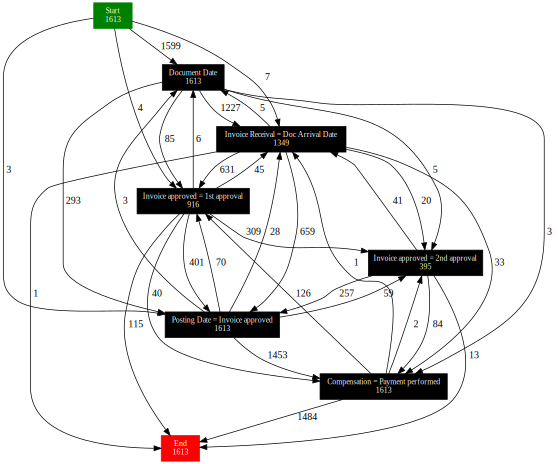

In [119]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

max_node = 5
max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()), _attributes={'color':'green', 'fontcolor':'white'})
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, weight = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  " + weight)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in sortnewtimetest.iterrows():
    g.node(row['startEvent'],label=row['startEvent'] + '\n '+ str(graph_count[graph_count['Events'] == row['startEvent']]['Count'].sum()))
    g.node(row['endEvent'],label=row['endEvent'] + '\n '+ str(graph_count[graph_count['Events'] == row['endEvent']]['Count'].sum()))

for index, row in sortnewtimetest.iterrows():
    startevent, endevent, duration, count = [str(i) for i in row]
    g.edge(str(row["startEvent"]), str(row["endEvent"]), label= "  " + count)
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(graph_count[graph_count['Events'] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()) , _attributes={'color':'red', 'fontcolor':'white'})
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, weight = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  " + weight)
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

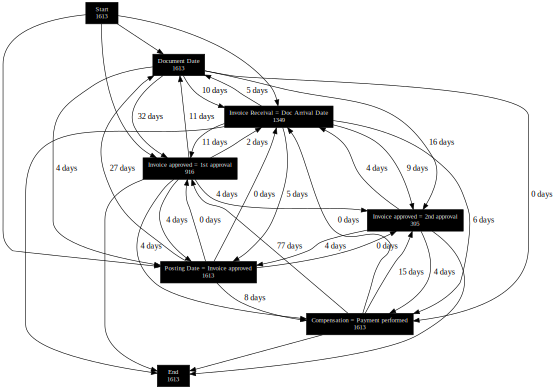

In [117]:
g = graphviz.Digraph('neato', format='png', encoding='utf8',
            filename='2_way_match', node_attr={'color': 'black', 'style': 'filled', 'fontcolor':'white','fontsize':'11'}, 
                     edge_attr={'weight': '1'})
g.attr('node', shape='box')
g.attr(rankdir='TB')
# h.attr(nodesep='0.1')
g.attr(size='7.75,10.25')

max_node = 5
max_case_id = sortnewtimetest['Count'].max()

# create all the possible nodes first
# you can modify the `label` 

for index, row in start_act.iterrows():
    g.node(row['Start'],label=row['Start'] + '\n '+ str(start_act[start_act['Start'] == row['Start']]['Weight'].sum()))
#     , _attributes={'color':'green', 'fontcolor':'white'}
    g.node(row['First Activity'],label=row['First Activity'] + '\n '+ str(start_act[start_act['First Activity'] == row['First Activity']]['Weight'].sum()))

for index, row in start_act.iterrows():
    starrt, firstact, weight = [str(i) for i in row]
    g.edge(str(row["Start"]), str(row["First Activity"]), label="  ")
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

for index, row in sortnewtimetest.iterrows():
    g.node(row['startEvent'],label=row['startEvent'] + '\n '+ str(graph_count[graph_count['Events'] == row['startEvent']]['Count'].sum()))
    g.node(row['endEvent'],label=row['endEvent'] + '\n '+ str(graph_count[graph_count['Events'] == row['endEvent']]['Count'].sum()))

for index, row in sortnewtimetest.iterrows():
    startevent, endevent, duration, count = [str(i) for i in row]
    g.edge(str(row["startEvent"]), str(row["endEvent"]), label= "  " + duration + " days")
# , penwidth=str(int(row["Count"])/max_case_id*max_node)
######################################################

for index, row in end_act.iterrows():
    g.node(row['Last Activity'],label=row['Last Activity'] + '\n '+ str(graph_count[graph_count['Events'] == row['Last Activity']]['Count'].sum()))
    g.node(row['End'],label=row['End'] + '\n '+ str(end_act[end_act['End'] == row['End']]['Weight'].sum()))
# ,  _attributes={'color':'red', 'fontcolor':'white'}
for index, row in end_act.iterrows():
    lastact, endact, weight = [str(i) for i in row]
    g.edge(str(row["Last Activity"]), str(row["End"]), label= "  ")
# , penwidth=str(int(row["Weight"])/max_case_id*max_node)
######################################################

# g.view()
g

### Timing